<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(2_8)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_2.8_n20.csv',
 'data_add_delta_2.8_n30.csv',
 'data_add_delta_2.8_n60.csv',
 'data_add_delta_2.8_n120.csv',
 'data_add_delta_2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,86.299487,86.677676,61.078229,63.489737,0.287092,307.832222,272.129931,35.702291
1,0.0,1.0,49.944543,72.394400,69.229255,63.994046,-497.592791,-232.030545,269.563079,-501.593624
2,0.0,2.0,80.429545,47.162515,74.970176,83.110203,121.043538,416.715977,272.392204,144.323773
3,0.0,3.0,41.357068,51.183632,43.801225,79.470067,566.016236,791.828229,260.340487,531.487742
4,0.0,4.0,62.511618,39.792596,32.844864,31.241732,-281.263445,-104.872635,213.873428,-318.746062
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,68.431274,53.057875,79.737345,63.509698,-262.177703,12.558490,223.368532,-210.810043
249996,999.0,246.0,40.601738,76.864597,49.762277,26.255731,-414.017829,-210.533486,272.610915,-483.144401
249997,999.0,247.0,77.059062,27.122230,82.908516,37.800684,-154.621297,80.269195,191.750096,-111.480901
249998,999.0,248.0,40.009161,48.207468,79.306751,91.414117,22.381139,291.318636,224.660608,66.658028


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,86.299487,86.677676,61.078229,63.489737,0.287092,307.832222,272.129931,35.702291
1,0.0,1.0,49.944543,72.394400,69.229255,63.994046,-497.592791,-232.030545,269.563079,-501.593624
2,0.0,2.0,80.429545,47.162515,74.970176,83.110203,121.043538,416.715977,272.392204,144.323773
3,0.0,3.0,41.357068,51.183632,43.801225,79.470067,566.016236,791.828229,260.340487,531.487742
4,0.0,4.0,62.511618,39.792596,32.844864,31.241732,-281.263445,-104.872635,213.873428,-318.746062
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,68.431274,53.057875,79.737345,63.509698,-262.177703,12.558490,223.368532,-210.810043
249996,999.0,246.0,40.601738,76.864597,49.762277,26.255731,-414.017829,-210.533486,272.610915,-483.144401
249997,999.0,247.0,77.059062,27.122230,82.908516,37.800684,-154.621297,80.269195,191.750096,-111.480901
249998,999.0,248.0,40.009161,48.207468,79.306751,91.414117,22.381139,291.318636,224.660608,66.658028


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    86.299487  86.677676  61.078229  63.489737    0.287092   
      1.0    49.944543  72.394400  69.229255  63.994046 -497.592791   
      2.0    80.429545  47.162515  74.970176  83.110203  121.043538   
      3.0    41.357068  51.183632  43.801225  79.470067  566.016236   
      4.0    62.511618  39.792596  32.844864  31.241732 -281.263445   
...                ...        ...        ...        ...         ...   
999.0 245.0  68.431274  53.057875  79.737345  63.509698 -262.177703   
      246.0  40.601738  76.864597  49.762277  26.255731 -414.017829   
      247.0  77.059062  27.122230  82.908516  37.800684 -154.621297   
      248.0  40.009161  48.207468  79.306751  91.414117   22.381139   
      249.0  99.296776  20.435576  25.347546  25.157646 -126.246391   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    307.832222  272.129931   35.702291  
      1.0   -232.030545  269.563079 -501.593624  
      2.0    416.715977  272.392204  144.323773  
      3.0    791.828229  260.340487  531.487742  
      4.0   -104.872635  213.873428 -318.746062  
...                 ...         ...         ...  
999.0 245.0   12.558490  223.368532 -210.810043  
      246.0 -210.533486  272.610915 -483.144401  
      247.0   80.269195  191.750096 -111.480901  
      248.0  291.318636  224.660608   66.658028  
      249.0   53.991154  173.519333 -119.528179  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    86.299487  86.677676  61.078229  63.489737    0.287092   
      1.0    49.944543  72.394400  69.229255  63.994046 -497.592791   
      2.0    80.429545  47.162515  74.970176  83.110203  121.043538   
      3.0    41.357068  51.183632  43.801225  79.470067  566.016236   
      4.0    62.511618  39.792596  32.844864  31.241732 -281.263445   
...                ...        ...        ...        ...         ...   
999.0 245.0  68.431274  53.057875  79.737345  63.509698 -262.177703   
      246.0  40.601738  76.864597  49.762277  26.255731 -414.017829   
      247.0  77.059062  27.122230  82.908516  37.800684 -154.621297   
      248.0  40.009161  48.207468  79.306751  91.414117   22.381139   
      249.0  99.296776  20.435576  25.347546  25.157646 -126.246391   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    307.832222  272.129931   35.702291  
      1.0   -232.030545  269.563079 -501.593624  
      2.0    416.715977  272.392204  144.323773  
      3.0    791.828229  260.340487  531.487742  
      4.0   -104.872635  213.873428 -318.746062  
...                 ...         ...         ...  
999.0 245.0   12.558490  223.368532 -210.810043  
      246.0 -210.533486  272.610915 -483.144401  
      247.0   80.269195  191.750096 -111.480901  
      248.0  291.318636  224.660608   66.658028  
      249.0   53.991154  173.519333 -119.528179  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,86.299487,86.677676,61.078229,63.489737,0.287092,307.832222,272.129931,35.702291
1,0.0,1.0,49.944543,72.394400,69.229255,63.994046,-497.592791,-232.030545,269.563079,-501.593624
2,0.0,2.0,80.429545,47.162515,74.970176,83.110203,121.043538,416.715977,272.392204,144.323773
3,0.0,3.0,41.357068,51.183632,43.801225,79.470067,566.016236,791.828229,260.340487,531.487742
4,0.0,4.0,62.511618,39.792596,32.844864,31.241732,-281.263445,-104.872635,213.873428,-318.746062
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,68.431274,53.057875,79.737345,63.509698,-262.177703,12.558490,223.368532,-210.810043
249996,999.0,246.0,40.601738,76.864597,49.762277,26.255731,-414.017829,-210.533486,272.610915,-483.144401
249997,999.0,247.0,77.059062,27.122230,82.908516,37.800684,-154.621297,80.269195,191.750096,-111.480901
249998,999.0,248.0,40.009161,48.207468,79.306751,91.414117,22.381139,291.318636,224.660608,66.658028


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    86.299487  86.677676  61.078229  63.489737    0.287092   
      1.0    49.944543  72.394400  69.229255  63.994046 -497.592791   
      2.0    80.429545  47.162515  74.970176  83.110203  121.043538   
      3.0    41.357068  51.183632  43.801225  79.470067  566.016236   
      4.0    62.511618  39.792596  32.844864  31.241732 -281.263445   
...                ...        ...        ...        ...         ...   
999.0 245.0  68.431274  53.057875  79.737345  63.509698 -262.177703   
      246.0  40.601738  76.864597  49.762277  26.255731 -414.017829   
      247.0  77.059062  27.122230  82.908516  37.800684 -154.621297   
      248.0  40.009161  48.207468  79.306751  91.414117   22.381139   
      249.0  99.296776  20.435576  25.347546  25.157646 -126.246391   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    307.832222  272.129931   35.702291  
      1.0   -232.030545  269.563079 -501.593624  
      2.0    416.715977  272.392204  144.323773  
      3.0    791.828229  260.340487  531.487742  
      4.0   -104.872635  213.873428 -318.746062  
...                 ...         ...         ...  
999.0 245.0   12.558490  223.368532 -210.810043  
      246.0 -210.533486  272.610915 -483.144401  
      247.0   80.269195  191.750096 -111.480901  
      248.0  291.318636  224.660608   66.658028  
      249.0   53.991154  173.519333 -119.528179  

[250000 rows x 8 columns]

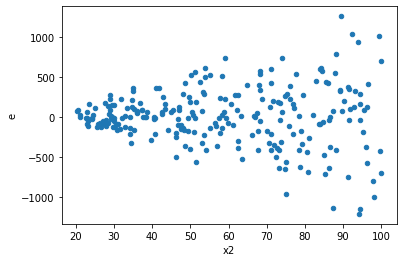

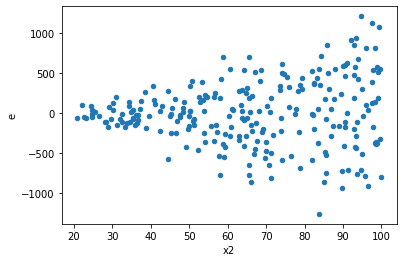

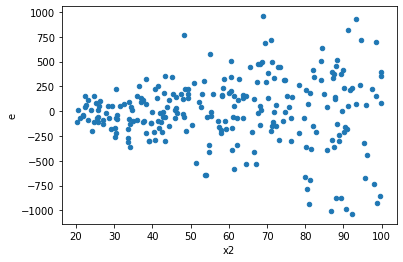

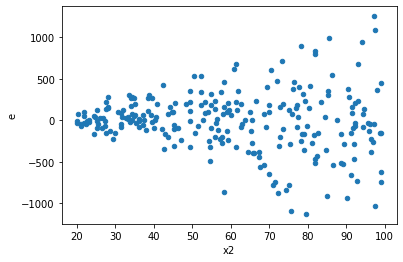

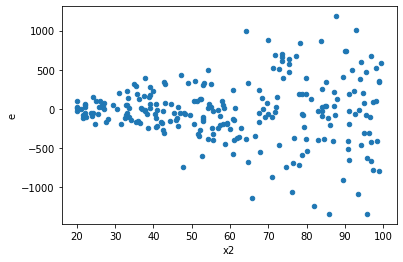

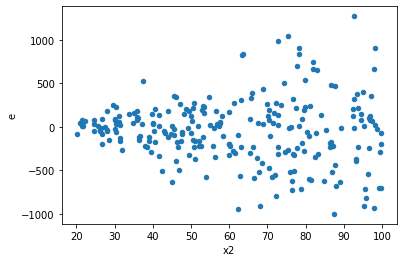

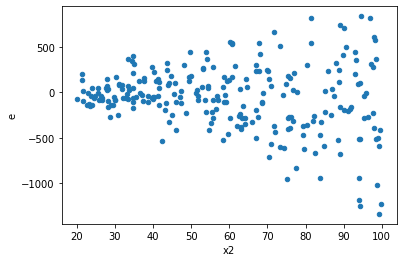

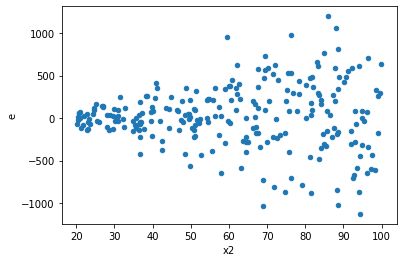

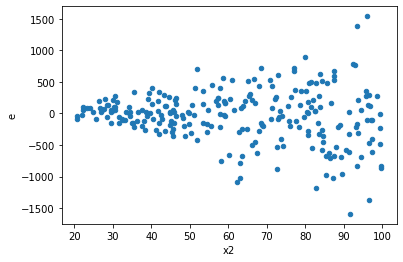

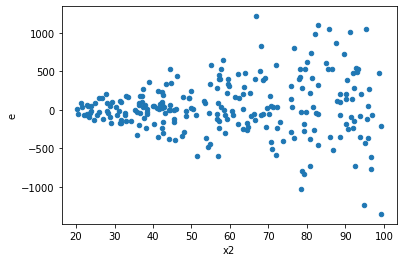

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,96.0,96.0,2471411.945806219,24742778.691145033,25743.874435481444,257737.27803276075,10.011596299488428,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
1.0,96.0,96.0,5032417.87220128,27047969.17044708,52421.019502096664,281749.6788588238,5.374746266572606,6.217248937900877e-15,0.9999999999999969,3.1086244689504383e-15,Reject005=0 : Heteroscedasticity
2.0,96.0,96.0,2811647.852680053,18959075.261405542,29287.99846541722,197490.36730630774,6.74304758447393,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
3.0,96.0,96.0,2595186.107649234,23479186.37236254,27033.188621346188,244574.8580454431,9.047207174529154,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
4.0,96.0,96.0,3033165.4048241004,27428234.39596897,31595.472966917714,285710.7749580101,9.042775693124323,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
5.0,96.0,96.0,3403680.4363044477,21884007.005192786,35455.004544838,227958.40630409154,6.429512821407344,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
6.0,96.0,96.0,2513294.752522026,22406752.50162997,26180.15367210444,233403.67189197885,8.915290369004818,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
7.0,96.0,96.0,2503843.7632296444,23899236.06527166,26081.705866975462,248950.37567991312,9.545018909025156,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
8.0,96.0,96.0,3481465.622492956,27786651.69482154,36265.266900968294,289444.2884877244,7.9813086521085586,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,2471411.945806219,24742778.691145033,25743.874435481444,257737.27803276075,10.011596299488428,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
1.0,96.0,96.0,5032417.87220128,27047969.17044708,52421.019502096664,281749.6788588238,5.374746266572606,6.217248937900877e-15,Reject005=0 : Heteroscedasticity
2.0,96.0,96.0,2811647.852680053,18959075.261405542,29287.99846541722,197490.36730630774,6.74304758447393,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
3.0,96.0,96.0,2595186.107649234,23479186.37236254,27033.188621346188,244574.8580454431,9.047207174529154,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,96.0,96.0,3033165.4048241004,27428234.39596897,31595.472966917714,285710.7749580101,9.042775693124323,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,96.0,96.0,3403680.4363044477,21884007.005192786,35455.004544838,227958.40630409154,6.429512821407344,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,96.0,96.0,2513294.752522026,22406752.50162997,26180.15367210444,233403.67189197885,8.915290369004818,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,96.0,96.0,2503843.7632296444,23899236.06527166,26081.705866975462,248950.37567991312,9.545018909025156,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,96.0,96.0,3481465.622492956,27786651.69482154,36265.266900968294,289444.2884877244,7.9813086521085586,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64